# El tratamiento de las variables categóricas

In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
# Librerias de prueba
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
# Librerias para plots
import matplotlib.pyplot as plt

In [2]:
mainpath = "E:/Curso de Python/Repositorio/python-ml-course/datasets/"
filepath = "ecom-expense/Ecom Expense.csv"
data = pd.read_csv(os.path.join(mainpath,filepath))

In [3]:
data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(data["Gender"],prefix = "Gender")
dummy_city_tier = pd.get_dummies(data["City Tier"], prefix = "City")

In [5]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [6]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [7]:
column_names = data.columns.values.tolist()

In [8]:
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [9]:
df_new = data[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [10]:
len(df_new)

2362

In [11]:
feature_cols = ["Monthly Income", "Transaction Time", 
                "Gender_Female", "Gender_Male", 
                "City_Tier 1", "City_Tier 2", "City_Tier 3",
                "Record", "Age "]
# Lista de los parámetros que pensamos que predicen el resultado

In [12]:
feature_cols

['Monthly Income',
 'Transaction Time',
 'Gender_Female',
 'Gender_Male',
 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3',
 'Record',
 'Age ']

In [13]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [14]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [15]:
lm.intercept_

-335.738001745377

In [16]:
lm.coef_

array([ 1.47442269e-01,  1.56391583e-01, -1.33088707e+02,  1.33088707e+02,
        7.83785050e+01,  5.20259633e+01, -1.30404468e+02,  7.72149205e+02,
        6.42429817e+00])

In [17]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.1474422689744858),
 ('Transaction Time', 0.15639158306366507),
 ('Gender_Female', -133.08870663170615),
 ('Gender_Male', 133.0887066317056),
 ('City_Tier 1', 78.37850497640333),
 ('City_Tier 2', 52.02596334431959),
 ('City_Tier 3', -130.40446832072277),
 ('Record', 772.1492053631353),
 ('Age ', 6.424298167613064)]

Los parámetros categorizados se complementan, por lo tanto su suma dará 0

In [18]:
lm.score(X,Y)
# Esto es R^2 Mejorada (Adjusted R Squared)

0.9187458997709432

El modelo puede ser escrito como:
* Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Gender_Female'* -131.02501325554567 + 'Gender_Male'* 131.0250132555456+'City_Tier 1'* 76.76432601049527 + 'City_Tier 2'* 55.138974309232474 + 'City_Tier 3'* -131.9033003197278+'Record'* 772.2334457445648
    * Si es hombre y vive en CT1: Total_Spend = 128.37220896466724 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648
    * Si es hombre y vive en CT2: Total_Spend = 106.74685726340445 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 +'Record'* 772.2334457445648
    * Si es hombre y vive en CT3: Total_Spend = -80.29541736555583 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648
    * Si es mujer y vive en CT1: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 76.76432601049527 +'Record'* 772.2334457445648
    * Si es mujer y vive en CT2: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 55.138974309232474  +'Record'* 772.2334457445648
    * Si es mujer y vive en CT3: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456-131.9033003197278 +'Record'* 772.2334457445648

In [19]:
type(list(zip(feature_cols, lm.coef_)))

list

In [20]:
vl = list(zip(feature_cols, lm.coef_))

In [21]:
vl[0][1]

0.1474422689744858

In [22]:
prediction = df_new[vl[0][0]]*vl[0][1] + df_new[vl[1][0]]*vl[1][1] + df_new[vl[2][0]]*vl[2][1] + df_new[vl[3][0]]*vl[3][1] + df_new[vl[4][0]]*vl[4][1] + df_new[vl[5][0]]*vl[5][1] + df_new[vl[6][0]]*vl[6][1] + df_new[vl[7][0]]*vl[7][1] + lm.intercept_

In [23]:
prediction

0       4646.705148
1       4536.151625
2       4898.597023
3       7809.408326
4       3319.500921
           ...     
2357    3078.947143
2358    7811.452469
2359    8791.696346
2360    7962.321820
2361    6561.530256
Length: 2362, dtype: float64

In [24]:
std_error = np.std(prediction - df_new["Total Spend"])
std_error

801.6065588158147

In [25]:
SSD = sum((prediction - df_new["Total Spend"])**2)
SSD

1674392305.081899

In [26]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE

843.7425497483871

Se perdío la seccionde eliminar variables categóricas redundantes

# Transformación de variables para conseguir una relación no lineal

In [27]:
mainpath = "E:/Curso de Python/Repositorio/python-ml-course/datasets/"
filepath = "auto/auto-mpg.csv"
data_auto = pd.read_csv(os.path.join(mainpath,filepath))

In [28]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [29]:
data_auto.shape

(406, 9)

In [70]:
features = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin"]
data_auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.951787,0.844158,0.895220,-0.522452,-0.360762,-0.567478
displacement,-0.804203,0.951787,1.000000,0.898326,0.932475,-0.557984,-0.381714,-0.613056
horsepower,-0.778427,0.844158,0.898326,1.000000,0.866586,-0.697124,-0.424419,-0.460033
weight,-0.831741,0.895220,0.932475,0.866586,1.000000,-0.430086,-0.315389,-0.584109
acceleration,0.420289,-0.522452,-0.557984,-0.697124,-0.430086,1.000000,0.301992,0.218845
model year,0.579267,-0.360762,-0.381714,-0.424419,-0.315389,0.301992,1.000000,0.187656
origin,0.563450,-0.567478,-0.613056,-0.460033,-0.584109,0.218845,0.187656,1.000000


Text(0.5, 1.0, 'CV vs MPG')

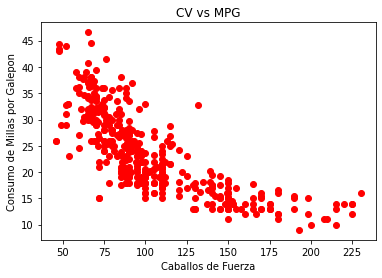

In [30]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"],"ro")
plt.xlabel("Caballos de Fuerza")
plt.ylabel("Consumo de Millas por Galepon")
plt.title("CV vs MPG")

### Modelo de Regresión lineal
* mpg = a + b * horsepower

In [31]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X = X[:,np.newaxis] # Se utiliza asi en el eje X por que la funcion fit de sklearn espera un objeto bidemencional

In [32]:
lm = LinearRegression()
lm.fit(X,Y) 

LinearRegression()

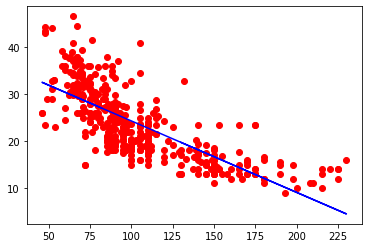

In [33]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X), color = "blue")

In [34]:
lm.score(X,Y)

0.5746533406450252

In [35]:
SSD = np.sum((Y - lm.predict(X))**2)
RSE = np.sqrt(SSD/(len(data_auto)-1))
SSD,RSE

(10315.751960060918, 5.046879480825511)

In [36]:
error_porcentaje = RSE/np.mean(Y)*100
error_porcentaje

21.462773361633474

### Modelo de Regresión Cuadrático
* mpg = a + b * horsepower^2

In [37]:
X = X**2

In [38]:
lm_squared = LinearRegression()
lm_squared.fit(X,Y) 

LinearRegression()

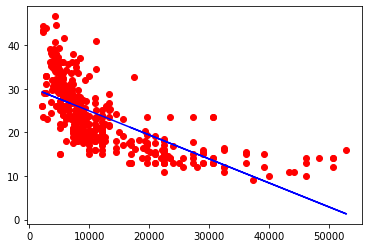

In [39]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm_squared.predict(X), color = "blue")

In [40]:
lm_squared.score(X,Y)

0.4849887034823205

In [41]:
SSD = np.sum((Y - lm_squared.predict(X))**2)
RSE = np.sqrt(SSD/(len(data_auto)-1))
SSD,RSE

(12490.350340501926, 5.553410772769817)

In [42]:
error_porcentaje = RSE/np.mean(Y)*100
error_porcentaje

23.616889852998113

### Modelo de Regresión lineal y cuadtático
* mpg = a + b horsepower + c horsepower^2

In [43]:
from sklearn.preprocessing import PolynomialFeatures # Libreria para utilizar modelos polinomiales
from sklearn import linear_model

In [44]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X = X[:,np.newaxis] # Se utiliza asi en el eje X por que la funcion fit de sklearn espera un objeto bidemencional

In [45]:
poly = PolynomialFeatures(degree = 2)

In [46]:
X_data = poly.fit_transform(X)

In [47]:
lm = linear_model.LinearRegression()
lm.fit(X_data,Y)

LinearRegression()

In [48]:
lm.score(X_data,Y)

0.6439066584257469

In [49]:
lm.intercept_

55.026192447081144

In [50]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = -0.434 * horsepower +  0.0011 * horsepower^2 + 55.0262

In [51]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%\n \n")

In [52]:
for d in range(2,5):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X)
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado "+str(d))
    print("R2:" +str(lm.score(X_data, Y)))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data, Y, lm.predict(X_data))

Regresión de grado 2
R2:0.6439066584257469
55.026192447081144
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, Y_mean: 23.514572864321607, error: 19.6379546619069%
 

Regresión de grado 3
R2:0.6444678885560744
58.448774111485776
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855, RSE: 4.614140736300908, Y_mean: 23.514572864321607, error: 19.622473106036686%
 

Regresión de grado 4
R2:0.6467674189704502
40.096643862778855
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.799832491353, RSE: 4.5991947315797574, Y_mean: 23.514572864321607, error: 19.55891250126879%
 



In [53]:
regresion_validation(X_data,Y,lm.predict(X_data))

SSD: 8566.799832491353, RSE: 4.5991947315797574, Y_mean: 23.514572864321607, error: 19.55891250126879%
 



# El problema de los Outliers
* Outliers: Datos que no siguen la tendencia del conjunto

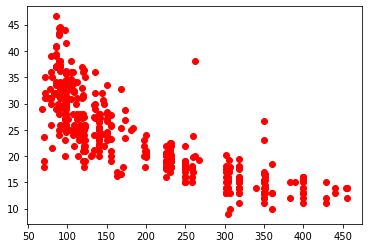

In [54]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [55]:
# Tratamiento de las variables:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
# Creamos el modelo lineal

lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [56]:
lm.score(X,Y)

0.6261049762826918

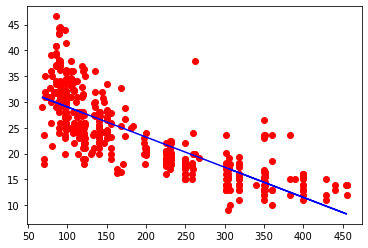

In [57]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X), color = "blue")

Los outliers afectan el modelo, actualmente el "R squared adjusted" tiene una puntuacion de 0.62, en teoria si se eliminaran los outliers se mejoraría esta puntuación

In [58]:
data_auto[(data_auto["displacement"]>250) & (data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [59]:
data_auto[(data_auto["displacement"]>300) & (data_auto["mpg"]>19)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
257,19.4,8,318.0,140.0,3735,13.2,78,1,dodge diplomat
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
269,19.2,8,305.0,145.0,3425,13.2,78,1,chevrolet monte carlo landau
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [60]:
data_auto_clean = data_auto.drop([395,257,258,269,305,372])

In [61]:
# Tratamiento de las variables:
X = data_auto_clean["displacement"].fillna(data_auto["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto["mpg"].mean())
# Creamos el modelo lineal

lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [62]:
lm.score(X,Y)

0.6467342702060378

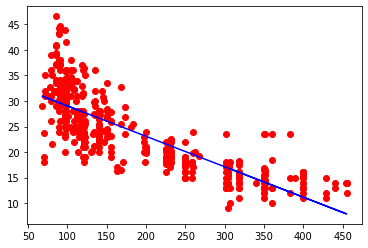

In [63]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X), color = "blue")

In [64]:
residuos = Y - lm.predict(X)

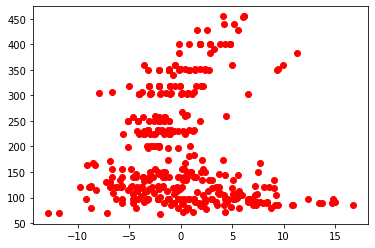

In [65]:
%matplotlib inline
plt.plot(residuos,X,"ro")

## La gráfica anterior, regfleja que los residuos no estan distribuidos al azar, lo que indica que el modelo que se implemento no es el mejor